# DT

In [1759]:
"""BreastCancerAI (c) by Roi Dvir
BreastCancerAI is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License.
You should have received a copy of the license along with this work. If not, see <http://creativecommons.org/licenses/by-nc-nd/4.0/>."""


# import libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [1760]:
# Sklearn library for implementing Machine Learning models and processing of data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [1761]:
from sklearn.tree import DecisionTreeClassifier

In [1762]:
#importing the dataset
dataset = pd.read_csv('./data/Breast_Cancer_Data_CSV.csv')
dataset.drop(['ID number'],axis=1,inplace=True)
dataset.head()
print("Cancer data set dimensions : {}".format(dataset.shape))
dataset.head()

Cancer data set dimensions : (569, 31)


,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [1763]:
dataset.head()

,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [1764]:
#features list

In [1765]:
# select features
features=list(dataset.columns[[1,2,3,4,5,6,7,23,26,27]])
features.append(dataset.columns[-1])
dataset = dataset[features]

In [1766]:
dataset

In [1767]:
# split dataframe into two based on diagnosis
dfM=dataset[dataset['Diagnosis'] ==1]
dfB=dataset[dataset['Diagnosis'] ==0]
dataset1 = shuffle(dataset)
X = dataset1.iloc[:, :-1].values
Y = dataset1.iloc[:, -1].values
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
#Encoding categorical data values 
# split our dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =     0.3, random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1768]:
def values_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    Accuracy=round((TN+TP)/float(TN+TP+FN+FP),3)
    Misclassification=1-Accuracy
    Sensitivity=round(TP/(float(TP+FN)),3)
    Specifity=round(TN/(float(TN+cm[0,1])),3)
    not_detected=round(FN/(FN+TN),5)
    a=np.array([Accuracy,Sensitivity,Specifity, not_detected])
    return(a)

In [1769]:
def draw_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    Accuracy=round((TN+TP)/float(TN+TP+FN+FP),3)
    Misclassification=1-Accuracy
    Sensitivity=round(TP/(float(TP+FN)),3)
    Specifity=round(TN/(float(TN+cm[0,1])),3)
    not_detected=round(FN/(FN+TN),5)
    print ('Accuracy=',Accuracy,'Sensitivity=', Sensitivity, 'Specifity=' ,Specifity,' notdetected=' , not_detected)
    plt.figure(figsize = (8,5))
    sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [1770]:
def dt_model_index_max():
    dt_scores = []
    for i in range(1, (X.shape[1]) + 1):
        dt_classifier = DecisionTreeClassifier(max_features = i,                   random_state     = 0)
        dt_classifier.fit(X_train, y_train)
        dt_scores.append(dt_classifier.score(X_test, y_test))
    t=max(dt_scores)
    ind_max=dt_scores.index(t)+1
    print("max score is", t, "max score is at index" ,ind_max)
    return(ind_max)

In [1771]:
def dt_print_max_features():
    dt_scores = []
    for i in range(1, (X.shape[1]) + 1):
        dt_classifier = DecisionTreeClassifier(max_features = i, random_state=0)
        dt_classifier.fit(X_train, y_train)
        dt_scores.append(dt_classifier.score(X_test, y_test))
    plt.plot([i for i in range(1, (X.shape[1]) + 1)], dt_scores, color='green')
    for i in range(1, (X.shape[1]) + 1):
        plt.text(i, dt_scores[i-1],  (i))
        plt.xticks([i for i in range(1, X.shape[1] + 1)])
        plt.xlabel('Max features')
        plt.ylabel('Scores')
        plt.title('Decision Tree Classifier scores for different number of         maximum features')

In [1772]:
def dt_model():
    dt_classifier = DecisionTreeClassifier(max_features=dt_model_index_max())
    dt=dt_classifier
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_test)
    print("score=",dt.score(X_test, y_test) )
    draw_confusion_matrix(y_test,y_pred)

max score is 0.9532163742690059 max score is at index 4
score= 0.9298245614035088
Accuracy= 0.93 Sensitivity= 0.85 Specifity= 0.973  notdetected= 0.07692


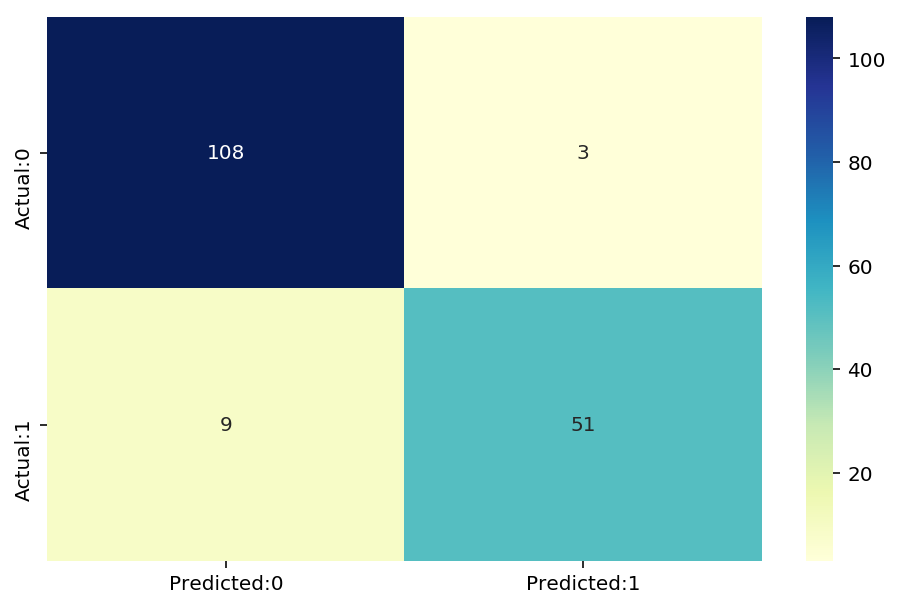

In [1773]:
dt_model()

In [1774]:
def dt_model_1():
    dt_classifier = DecisionTreeClassifier(max_features=dt_model_index_max())
    dt=dt_classifier
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_test)
    return(y_pred)

In [1775]:
dt_model_1()

max score is 0.9532163742690059 max score is at index 4


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

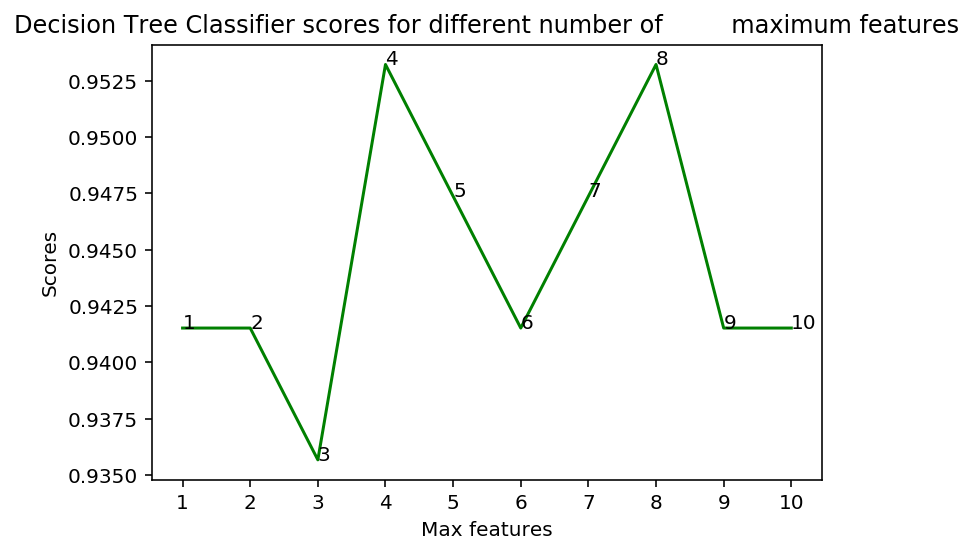

In [1776]:
dt_print_max_features()

In [1777]:
def find_features_importance(n):
    clf = DecisionTreeClassifier(max_features =                     X.shape[1],random_state = 0)
    clf = clf.fit(X_train, y_train)
    importances = clf.feature_importances_
    idx = (-importances).argsort()[:n]
    print( idx)

In [1778]:
find_features_importance(10)

[7 9 0 3 5 8 2 1 4 6]


In [1779]:
def cross_valid_score(n):
    clf =  DecisionTreeClassifier(max_features=10)
    scores = cross_val_score(clf, X, Y, cv=n)
    print('average=',np.average(scores),'std=', np.std(scores))

In [1780]:
cross_valid_score(5)

average= 0.9349749903809157 std= 0.014352117274797708


In [1781]:
para=np.zeros([1000,4])
i=0
for i in range (1000):
    dataset1 = shuffle(dataset)
    X = dataset1.iloc[:, :-1].values
    Y = dataset1.iloc[:, -1].values
    labelencoder_Y = LabelEncoder()
    Y = labelencoder_Y.fit_transform(Y)
    #Encoding categorical data values 
    # split our dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =     0.3,     random_state = 0)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    y_pred=dt_model_1()

    a=values_confusion_matrix(y_test,y_pred)
    para[i,:]=a
    i=i+1

print(np.average(para, axis=0))
print(np.std(para, axis=0))

max score is 0.9649122807017544 max score is at index 5
max score is 0.9590643274853801 max score is at index 5
max score is 0.9590643274853801 max score is at index 2


max score is 0.935672514619883 max score is at index 7
max score is 0.9824561403508771 max score is at index 9


max score is 0.9415204678362573 max score is at index 1
max score is 0.9707602339181286 max score is at index 6


max score is 0.9473684210526315 max score is at index 10
max score is 0.9239766081871345 max score is at index 4
max score is 0.9590643274853801 max score is at index 2


max score is 0.9532163742690059 max score is at index 3
max score is 0.9649122807017544 max score is at index 7


max score is 0.9532163742690059 max score is at index 5
max score is 0.9649122807017544 max score is at index 3


max score is 0.9590643274853801 max score is at index 6
max score is 0.9649122807017544 max score is at index 3
max score is 0.9415204678362573 max score is at index 6


max score is 0.9532163742690059 max score is at index 7
max score is 0.9590643274853801 max score is at index 1


max score is 0.9298245614035088 max score is at index 2
max score is 0.9707602339181286 max score is at index 9


max score is 0.9590643274853801 max score is at index 1
max score is 0.935672514619883 max score is at index 2


max score is 0.9473684210526315 max score is at index 2
max score is 0.9590643274853801 max score is at index 7
max score is 0.9766081871345029 max score is at index 7


max score is 0.9590643274853801 max score is at index 5
max score is 0.9473684210526315 max score is at index 3


max score is 0.9532163742690059 max score is at index 7
max score is 0.9532163742690059 max score is at index 4


max score is 0.9590643274853801 max score is at index 2
max score is 0.9473684210526315 max score is at index 8
max score is 0.9649122807017544 max score is at index 8


max score is 0.9473684210526315 max score is at index 8


max score is 0.9532163742690059 max score is at index 2
max score is 0.9415204678362573 max score is at index 8
max score is 0.9298245614035088 max score is at index 2


max score is 0.935672514619883 max score is at index 6
max score is 0.9766081871345029 max score is at index 9
max score is 0.9590643274853801 max score is at index 5


max score is 0.9649122807017544 max score is at index 4


max score is 0.9590643274853801 max score is at index 3
max score is 0.9473684210526315 max score is at index 5
max score is 0.9473684210526315 max score is at index 1


max score is 0.9473684210526315 max score is at index 3
max score is 0.9532163742690059 max score is at index 8
max score is 0.9590643274853801 max score is at index 5


max score is 0.9649122807017544 max score is at index 5
max score is 0.9298245614035088 max score is at index 1


max score is 0.9532163742690059 max score is at index 7
max score is 0.9590643274853801 max score is at index 8
max score is 0.9532163742690059 max score is at index 6
max score is 0.9473684210526315 max score is at index 1


max score is 0.9649122807017544 max score is at index 9
max score is 0.9181286549707602 max score is at index 3


max score is 0.9590643274853801 max score is at index 7
max score is 0.9532163742690059 max score is at index 8


max score is 0.9532163742690059 max score is at index 9
max score is 0.9532163742690059 max score is at index 6
max score is 0.9649122807017544 max score is at index 2
max score is 0.9532163742690059 max score is at index 4
max score is 0.9415204678362573 max score is at index 6


max score is 0.9649122807017544 max score is at index 1
max score is 0.935672514619883 max score is at index 6


max score is 0.9473684210526315 max score is at index 1
max score is 0.9298245614035088 max score is at index 8
max score is 0.9649122807017544 max score is at index 4


max score is 0.9473684210526315 max score is at index 3
max score is 0.9707602339181286 max score is at index 9
max score is 0.9707602339181286 max score is at index 4
max score is 0.9532163742690059 max score is at index 2


max score is 0.9590643274853801 max score is at index 9
max score is 0.9415204678362573 max score is at index 3


max score is 0.935672514619883 max score is at index 2
max score is 0.9766081871345029 max score is at index 6
max score is 0.9707602339181286 max score is at index 8


max score is 0.935672514619883 max score is at index 4
max score is 0.9766081871345029 max score is at index 6
max score is 0.9415204678362573 max score is at index 6


max score is 0.9649122807017544 max score is at index 2
max score is 0.9649122807017544 max score is at index 5


max score is 0.9649122807017544 max score is at index 5
max score is 0.9415204678362573 max score is at index 6
max score is 0.9707602339181286 max score is at index 6


max score is 0.9415204678362573 max score is at index 1
max score is 0.9473684210526315 max score is at index 3
max score is 0.9707602339181286 max score is at index 9
max score is 0.9532163742690059 max score is at index 1


max score is 0.9649122807017544 max score is at index 6


max score is 0.935672514619883 max score is at index 3
max score is 0.9473684210526315 max score is at index 2
max score is 0.9532163742690059 max score is at index 7


max score is 0.935672514619883 max score is at index 2
max score is 0.9239766081871345 max score is at index 1
max score is 0.9532163742690059 max score is at index 8
max score is 0.9649122807017544 max score is at index 4
max score is 0.935672514619883 max score is at index 4


max score is 0.9473684210526315 max score is at index 2


max score is 0.9532163742690059 max score is at index 2
max score is 0.9590643274853801 max score is at index 4
max score is 0.9766081871345029 max score is at index 3


max score is 0.9649122807017544 max score is at index 9
max score is 0.9298245614035088 max score is at index 3
max score is 0.9473684210526315 max score is at index 1
max score is 0.9473684210526315 max score is at index 9


max score is 0.9707602339181286 max score is at index 3
max score is 0.9532163742690059 max score is at index 1
max score is 0.9532163742690059 max score is at index 7


max score is 0.9532163742690059 max score is at index 5
max score is 0.9590643274853801 max score is at index 2
max score is 0.9532163742690059 max score is at index 7
max score is 0.9532163742690059 max score is at index 10
max score is 0.9707602339181286 max score is at index 9
max score is 0.9649122807017544 max score is at index 9


max score is 0.9824561403508771 max score is at index 7
max score is 0.9473684210526315 max score is at index 7
max score is 0.9415204678362573 max score is at index 3


max score is 0.9649122807017544 max score is at index 10
max score is 0.9532163742690059 max score is at index 7
max score is 0.9415204678362573 max score is at index 6
max score is 0.9766081871345029 max score is at index 10
max score is 0.9649122807017544 max score is at index 5
max score is 0.9239766081871345 max score is at index 2


max score is 0.9473684210526315 max score is at index 6
max score is 0.9590643274853801 max score is at index 3
max score is 0.9766081871345029 max score is at index 8


max score is 0.9532163742690059 max score is at index 5
max score is 0.9766081871345029 max score is at index 9
max score is 0.9532163742690059 max score is at index 6
max score is 0.9532163742690059 max score is at index 3
max score is 0.9415204678362573 max score is at index 1
max score is 0.9707602339181286 max score is at index 7


max score is 0.9707602339181286 max score is at index 4
max score is 0.9649122807017544 max score is at index 7
max score is 0.9649122807017544 max score is at index 1


max score is 0.9415204678362573 max score is at index 3
max score is 0.9590643274853801 max score is at index 10
max score is 0.935672514619883 max score is at index 6
max score is 0.9415204678362573 max score is at index 10
max score is 0.9532163742690059 max score is at index 1


max score is 0.935672514619883 max score is at index 4
max score is 0.9473684210526315 max score is at index 9
max score is 0.9649122807017544 max score is at index 3


max score is 0.935672514619883 max score is at index 5
max score is 0.9415204678362573 max score is at index 2
max score is 0.9415204678362573 max score is at index 8
max score is 0.9473684210526315 max score is at index 8
max score is 0.9532163742690059 max score is at index 4
max score is 0.9707602339181286 max score is at index 6


max score is 0.9532163742690059 max score is at index 8
max score is 0.9473684210526315 max score is at index 9
max score is 0.9649122807017544 max score is at index 3


max score is 0.9649122807017544 max score is at index 5
max score is 0.9707602339181286 max score is at index 2
max score is 0.9473684210526315 max score is at index 6
max score is 0.9590643274853801 max score is at index 2
max score is 0.9473684210526315 max score is at index 6
max score is 0.935672514619883 max score is at index 2


max score is 0.9415204678362573 max score is at index 9
max score is 0.9532163742690059 max score is at index 5
max score is 0.9532163742690059 max score is at index 9


max score is 0.935672514619883 max score is at index 3
max score is 0.9590643274853801 max score is at index 6
max score is 0.9532163742690059 max score is at index 7
max score is 0.9766081871345029 max score is at index 2
max score is 0.9532163742690059 max score is at index 8
max score is 0.9532163742690059 max score is at index 1
max score is 0.9473684210526315 max score is at index 3


max score is 0.935672514619883 max score is at index 2
max score is 0.9473684210526315 max score is at index 10
max score is 0.9415204678362573 max score is at index 6


max score is 0.9707602339181286 max score is at index 9
max score is 0.9649122807017544 max score is at index 4
max score is 0.9473684210526315 max score is at index 10
max score is 0.9473684210526315 max score is at index 4
max score is 0.9707602339181286 max score is at index 7
max score is 0.9649122807017544 max score is at index 7


max score is 0.9649122807017544 max score is at index 3
max score is 0.9707602339181286 max score is at index 6
max score is 0.9532163742690059 max score is at index 3


max score is 0.9532163742690059 max score is at index 3
max score is 0.9766081871345029 max score is at index 8
max score is 0.935672514619883 max score is at index 2
max score is 0.9473684210526315 max score is at index 5


max score is 0.935672514619883 max score is at index 2
max score is 0.9707602339181286 max score is at index 6


max score is 0.9532163742690059 max score is at index 5
max score is 0.9590643274853801 max score is at index 3
max score is 0.9473684210526315 max score is at index 6


max score is 0.9532163742690059 max score is at index 6
max score is 0.9532163742690059 max score is at index 4
max score is 0.9824561403508771 max score is at index 6
max score is 0.9532163742690059 max score is at index 1


max score is 0.9590643274853801 max score is at index 6
max score is 0.9473684210526315 max score is at index 5
max score is 0.935672514619883 max score is at index 2
max score is 0.935672514619883 max score is at index 5


max score is 0.9766081871345029 max score is at index 3
max score is 0.9707602339181286 max score is at index 6
max score is 0.9298245614035088 max score is at index 4
max score is 0.9590643274853801 max score is at index 9
max score is 0.9707602339181286 max score is at index 7


max score is 0.9707602339181286 max score is at index 3
max score is 0.9415204678362573 max score is at index 4
max score is 0.9473684210526315 max score is at index 2
max score is 0.9532163742690059 max score is at index 7


max score is 0.9415204678362573 max score is at index 5
max score is 0.9649122807017544 max score is at index 2
max score is 0.9766081871345029 max score is at index 2
max score is 0.9473684210526315 max score is at index 5
max score is 0.935672514619883 max score is at index 1


max score is 0.9473684210526315 max score is at index 8
max score is 0.9590643274853801 max score is at index 7
max score is 0.9473684210526315 max score is at index 8
max score is 0.9415204678362573 max score is at index 1
max score is 0.9473684210526315 max score is at index 3


max score is 0.9473684210526315 max score is at index 9
max score is 0.9181286549707602 max score is at index 6
max score is 0.9766081871345029 max score is at index 8
max score is 0.9590643274853801 max score is at index 1
max score is 0.9473684210526315 max score is at index 7


max score is 0.9473684210526315 max score is at index 9
max score is 0.9590643274853801 max score is at index 4
max score is 0.9532163742690059 max score is at index 4
max score is 0.9532163742690059 max score is at index 2
max score is 0.9707602339181286 max score is at index 3


max score is 0.9590643274853801 max score is at index 5
max score is 0.9415204678362573 max score is at index 1
max score is 0.9590643274853801 max score is at index 6
max score is 0.9649122807017544 max score is at index 1


max score is 0.9415204678362573 max score is at index 6
max score is 0.9649122807017544 max score is at index 7
max score is 0.9532163742690059 max score is at index 6
max score is 0.9649122807017544 max score is at index 7
max score is 0.9707602339181286 max score is at index 5


max score is 0.9473684210526315 max score is at index 2
max score is 0.9415204678362573 max score is at index 2
max score is 0.9473684210526315 max score is at index 5
max score is 0.9473684210526315 max score is at index 5


max score is 0.9298245614035088 max score is at index 5
max score is 0.9766081871345029 max score is at index 8
max score is 0.9532163742690059 max score is at index 3
max score is 0.9707602339181286 max score is at index 2


max score is 0.9532163742690059 max score is at index 7
max score is 0.9532163742690059 max score is at index 7
max score is 0.9532163742690059 max score is at index 5
max score is 0.9766081871345029 max score is at index 7
max score is 0.9532163742690059 max score is at index 2


max score is 0.9415204678362573 max score is at index 7
max score is 0.9473684210526315 max score is at index 8
max score is 0.9707602339181286 max score is at index 6


max score is 0.9590643274853801 max score is at index 3
max score is 0.9766081871345029 max score is at index 5
max score is 0.9649122807017544 max score is at index 9
max score is 0.9590643274853801 max score is at index 2
max score is 0.9415204678362573 max score is at index 1


max score is 0.9415204678362573 max score is at index 2
max score is 0.9707602339181286 max score is at index 5
max score is 0.9590643274853801 max score is at index 6


max score is 0.9473684210526315 max score is at index 5
max score is 0.9532163742690059 max score is at index 2
max score is 0.9590643274853801 max score is at index 3
max score is 0.9707602339181286 max score is at index 5


max score is 0.9590643274853801 max score is at index 2
max score is 0.935672514619883 max score is at index 3
max score is 0.9298245614035088 max score is at index 5
max score is 0.9532163742690059 max score is at index 4


max score is 0.9707602339181286 max score is at index 3
max score is 0.9590643274853801 max score is at index 6
max score is 0.935672514619883 max score is at index 3
max score is 0.9473684210526315 max score is at index 8
max score is 0.935672514619883 max score is at index 6
max score is 0.9590643274853801 

max score is at index 4
max score is 0.9707602339181286 max score is at index 1
max score is 0.9415204678362573 max score is at index 3
max score is 0.9707602339181286 max score is at index 2


max score is 0.9532163742690059 max score is at index 3
max score is 0.9532163742690059 max score is at index 8
max score is 0.9707602339181286 max score is at index 9
max score is 0.9590643274853801 max score is at index 5
max score is 0.9649122807017544 max score is at index 5
max score is 0.9766081871345029 max score is at index 6


max score is 0.9649122807017544 max score is at index 7
max score is 0.9590643274853801 max score is at index 7
max score is 0.9473684210526315 max score is at index 9


max score is 0.9590643274853801 max score is at index 8
max score is 0.9473684210526315 max score is at index 4
max score is 0.9649122807017544 max score is at index 10
max score is 0.9532163742690059 max score is at index 2


max score is 0.9532163742690059 max score is at index 4
max score is 0.9239766081871345 max score is at index 4
max score is 0.9532163742690059 max score is at index 5
max score is 0.9415204678362573 max score is at index 1


max score is 0.9590643274853801 max score is at index 5
max score is 0.9473684210526315 max score is at index 8
max score is 0.9473684210526315 max score is at index 3
max score is 0.9473684210526315 max score is at index 1
max score is 0.9415204678362573 max score is at index 1


max score is 0.9649122807017544 max score is at index 4
max score is 0.9532163742690059 max score is at index 6
max score is 0.935672514619883 max score is at index 8
max score is 0.9473684210526315 max score is at index 1
max score is 0.9415204678362573 max score is at index 5


max score is 0.9415204678362573 max score is at index 1
max score is 0.9766081871345029 max score is at index 2
max score is 0.9649122807017544 max score is at index 1
max score is 0.9590643274853801 max score is at index 2


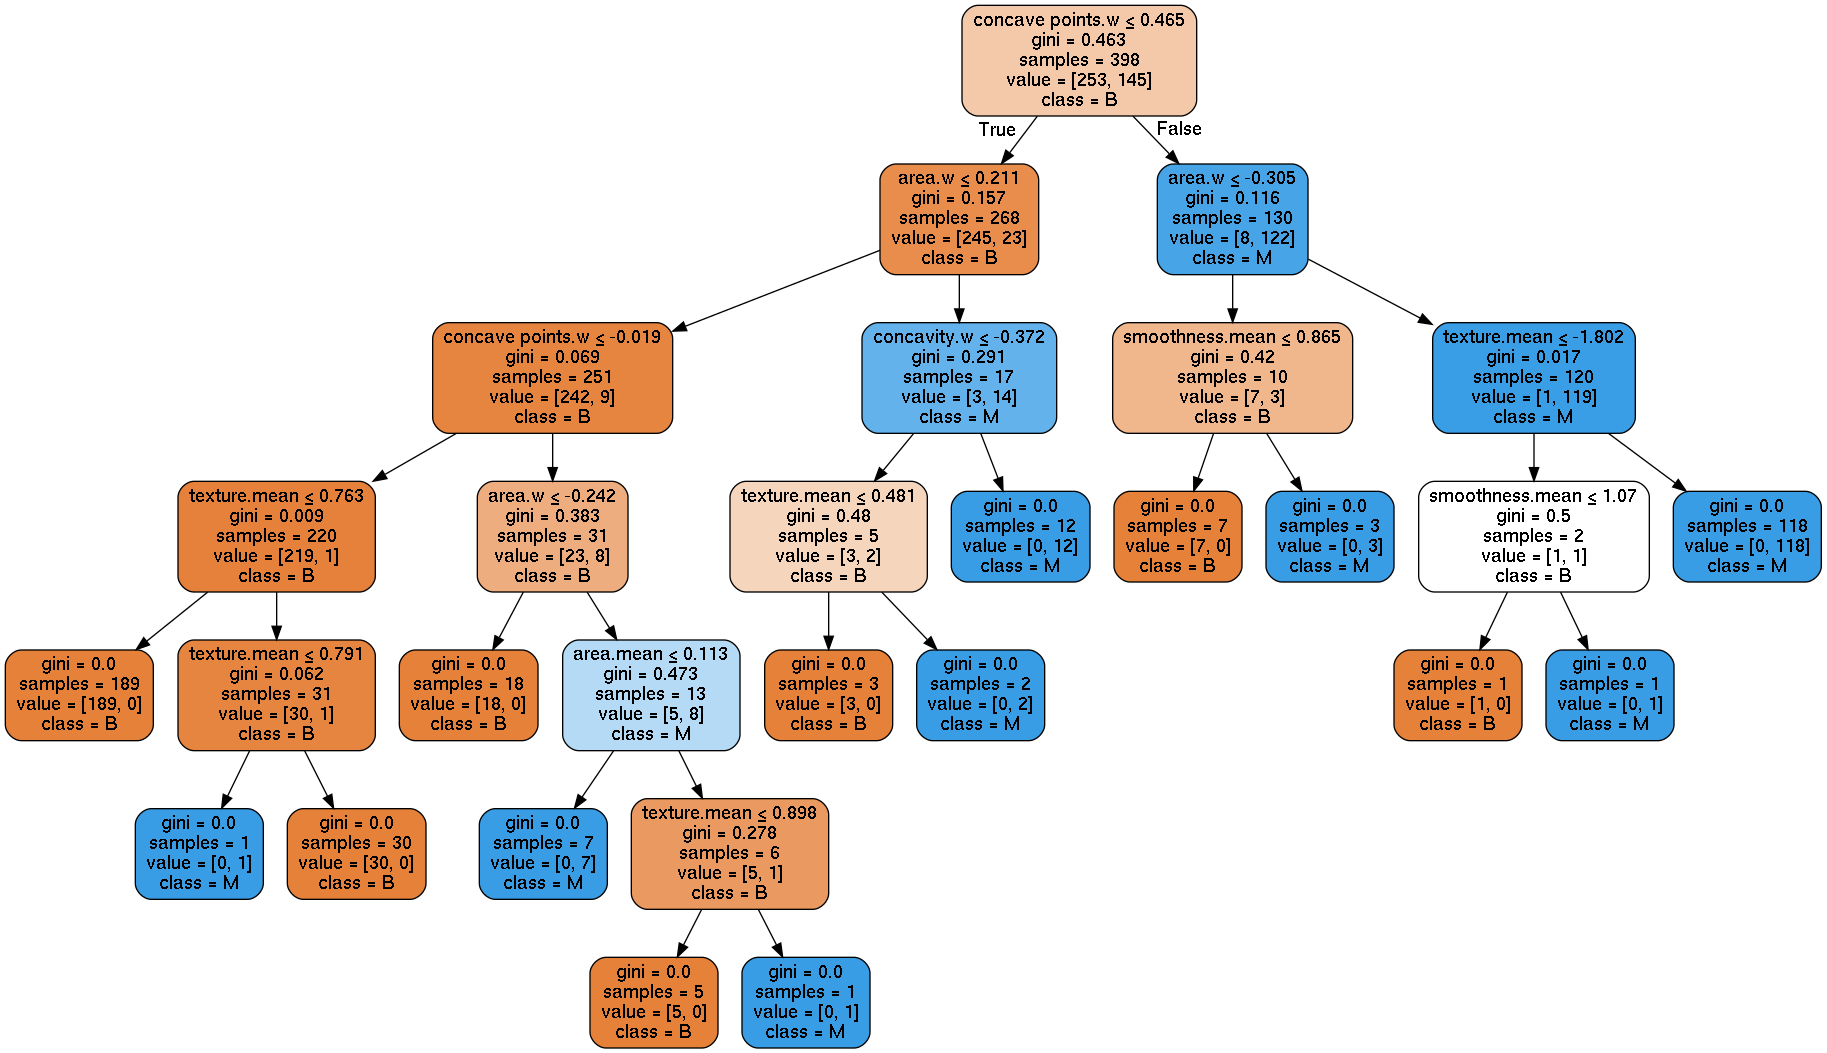

In [1782]:
# instantiating the model
tree =  DecisionTreeClassifier()

# fitting the model
model = tree.fit(X_train,y_train)

#plot desicion tree

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()

export_graphviz(model, out_file = dot_data, filled=True, rounded=True, proportion=False, special_characters=True, feature_names=features[:-1], class_names=['B', 'M'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())